In [66]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
# Load data
df_header = pd.read_csv('/content/STONYBRK_20240531_HEADER.csv')
df_code = pd.read_csv('/content/STONYBRK_20240531_CODE.csv')
df_line = pd.read_csv('/content/STONYBRK_20240531_LINE.csv')

In [68]:
# Part 1: Data Loading and Exploration for HEADER FILE
# Instructions: Explore each file by displaying:
# Shape (number of rows and columns)
# First 5 rows
# Column names and data types
# Missing value counts
# Basic descriptive statistics for numeric columns

print("HEADER FILE")

# Shape
print("Shape:", df_header.shape)

# First 5 rows
print("First 5 rows:")
print(df_header.head())

# Column names and data types
print("Column names and data types:")
print(df_header.dtypes)

# Missing value counts
print("Missing value counts:")
print(df_header.isnull().sum())

# Descriptive statistics for numeric columns
print("Descriptive statistics for numeric columns:")
print(df_header.describe())

HEADER FILE
Shape: (388, 43)
First 5 rows:
   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN               

In [69]:
# Part 1: Data Loading and Exploration for CODE FILE
print("CODE FILE")

# Shape
print("Shape:", df_code.shape)

# First 5 rows
print("First 5 rows:")
print(df_code.head())

# Column names and data types
print("Column names and data types:")
print(df_code.dtypes)

# Missing value counts
print("Missing value counts:")
print(df_code.isnull().sum())

# Descriptive statistics for numeric columns
print("Descriptive statistics for numeric columns:")
print(df_code.describe())


CODE FILE
Shape: (1536, 9)
First 5 rows:
   ClientId  ProspectiveClaimId CodeQualifier  CodePos CodeValue  \
0        49            36752505           ABF        3     G93.6   
1        49            36819490           ABF        4     N17.9   
2        49            35352862           ABF        2     G06.1   
3        49            35244774           ABF       10     G90.8   
4        49            36745815           ABK        1   I77.819   

   CodeFromDate  CodeToDate  CodeAmnt  POAInd  
0           NaN         NaN       NaN     NaN  
1           NaN         NaN       NaN     NaN  
2           NaN         NaN       NaN     NaN  
3           NaN         NaN       NaN     NaN  
4           NaN         NaN       NaN     NaN  
Column names and data types:
ClientId                int64
ProspectiveClaimId      int64
CodeQualifier          object
CodePos                 int64
CodeValue              object
CodeFromDate          float64
CodeToDate            float64
CodeAmnt              f

In [70]:
# Part 1: Data Loading and Exploration for LINE FILE
print("LINE FILE")

# Shape
print("Shape:", df_line.shape)

# First 5 rows
print("First 5 rows:")
print(df_line.head())

# Column names and data types
print("Column names and data types:")
print(df_line.dtypes)

# Missing value counts
print("Missing value counts:")
print(df_line.isnull().sum())

# Descriptive statistics for numeric columns
print("Descriptive statistics for numeric columns:")
print(df_line.describe())

LINE FILE
Shape: (520, 28)
First 5 rows:
   ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   
1        49            35235657        1      NaN  99291        GC        25   
2        49            35244774        1      NaN  99291        GC        25   
3        49            35249003        1      NaN  99291        GC       NaN   
4        49            35249014        1      NaN  99291        GC       NaN   

   Modifier3  Modifier4            DxMapDelim  ...  PlaceOfService  NDC  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
1        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
2        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
3        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   
4        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   

   NDCUnits  NDCRx NDCUnitQ

In [71]:
# Document Observations
print("Observations:")

# 1. How many unique claims are in the dataset?
print("Number of unique claims:", df_header['ProspectiveClaimId'].nunique())

# 2. What is the date range of the claims?
df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'])
print("Date range of claims:", df_header['ServiceFromDate'].min(), "to", df_header['ServiceFromDate'].max())

# 3. How many service lines are there on average per claim?
print("Average number of service lines per claim:", df_line.groupby('ProspectiveClaimId').size().mean())

# 4. How many diagnosis code are there on average per claim?
print("Average number of diagnosis codes per claim:", df_code.groupby('ProspectiveClaimId').size().mean())

# Interpretations: The dataset containts 388 unique claims on average, each claim has about 1.34 service lines and 3.96 diagnosis codes

Observations:
Number of unique claims: 388
Date range of claims: 2023-09-25 00:00:00 to 2024-05-29 00:00:00
Average number of service lines per claim: 1.3402061855670102
Average number of diagnosis codes per claim: 3.9587628865979383


/tmp/ipython-input-3580185258.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'])


Q1: TOP 5 BILLING PROVIDERS
                  BillingProvFirstName  BillingProviderNPI  ClaimCount
3                        SB INTERNISTS          1821035601         152
5               SB SURGICAL ASSOCIATES          1063468536          81
0     NEW YORK SPINE AND BRAIN SURGERY          1154376309          69
6  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY          1538114723          40
4            SB PSYCHIATRIC ASSOCIATES          1437105905          36


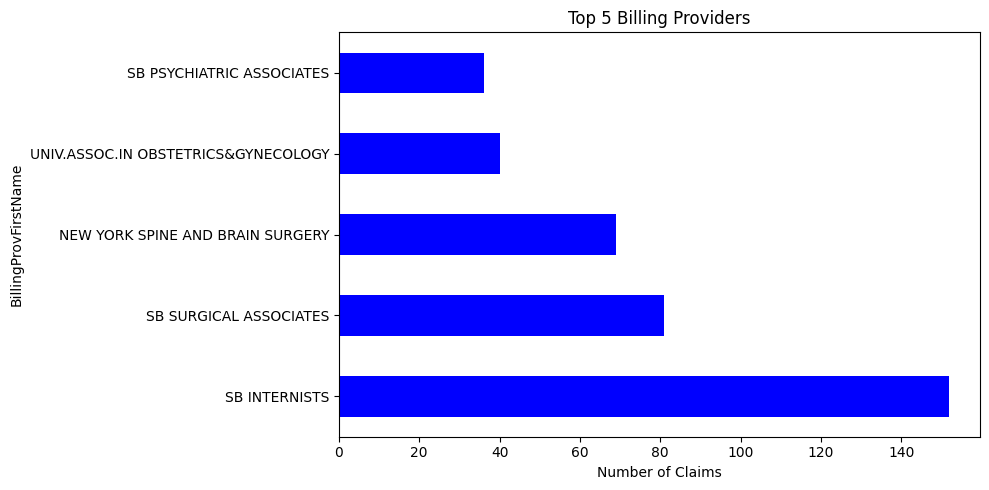

In [72]:
# Part 2: Relational Analysis
# Question 1: Who are the top 5 billing providers by number of claims?
# Display: Provider name, NPI, and claim count
# Create a simple bar chart showing the top 5 providers

print("Q1: TOP 5 BILLING PROVIDERS")

# Count claims by billing provider
top_providers = df_header.groupby(['BillingProvFirstName', 'BillingProviderNPI']).size().reset_index(name='ClaimCount')
top_providers = top_providers.sort_values('ClaimCount', ascending=False).head(5)
print(top_providers)

# Bar Chart
top_providers.plot(kind='barh', x='BillingProvFirstName', y='ClaimCount', color='blue', figsize=(10,5), legend=False)
plt.xlabel('Number of Claims')
plt.title('Top 5 Billing Providers')
plt.tight_layout()
plt.show()

# Interpretation: SB Internists is the top billing provider with 152 claims.

Q2: Top 5 primary payers by claim volume:
                            Count  Percentage
PrimaryPayerName                             
MEDICARE                      242       62.37
HEALTHFIRST FFS                46       11.86
FIDELIS/BETTER HEALTH PLAN     26        6.70
HIP MEDICAID                   17        4.38
HEALTHFIRST CAPITATED          10        2.58


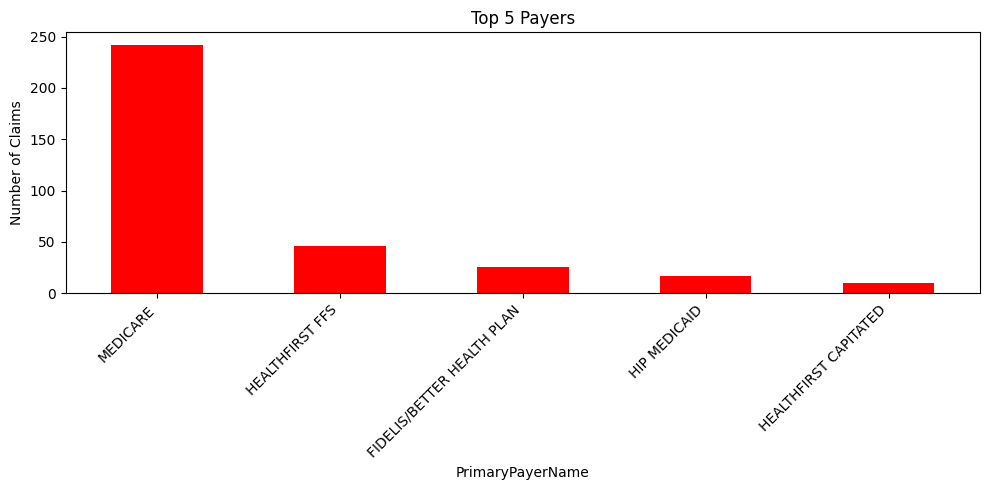

In [73]:
# Part 2: Relational Analysis
# Question 2: What are the top 5 primary payers by claim volume?
# Calculate the percentage of total claims for each payer
# Create a bar chart or pie chart showing payer distribution

print("Q2: Top 5 primary payers by claim volume:")

# Count claims by payer and calculate percentages
payer_counts = df_header['PrimaryPayerName'].value_counts().head(5)
payer_pct = (payer_counts / len(df_header) * 100).round(2)
print(pd.DataFrame({'Count': payer_counts, 'Percentage': payer_pct}))

# Bar Chart
payer_counts.plot(kind='bar', color='red', figsize=(10,5))
plt.ylabel('Number of Claims')
plt.title('Top 5 Payers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interpretation: Medicare is the top payer with 242 claims (62.37% of all claims).

In [74]:
# Part 2: Relational Analysis
# Question 3: What are the 10 most frequently appearing diagnosis codes (CodeValue)?
# Display: ICD-10 code and frequency count

print("Q3: TOP 10 DIAGNOSES")

# Count diagnosis codes
top_dx = df_code['CodeValue'].value_counts().head(10)
print(top_dx)

# Interpretation: The most common diagnosis code is J96.01 (Acute respiratory failure with hypoxia) with 62 occurrences.

Q3: TOP 10 DIAGNOSES
CodeValue
J96.01    62
I10       49
E78.5     49
G93.5     34
D64.9     29
I25.10    27
I61.9     26
I48.91    24
I60.8     24
I50.9     22
Name: count, dtype: int64


Q4: TOP 10 PROCEDURES
Top 10 Most Frequently Billed Procedure Codes:
    HCPCS                                        Description  Frequency
81  99291                  CRITICAL CARE, INITIAL FIRST HOUR         68
76  99233  SUBSEQUENT HOSP. CARE,PER DAY,FOR THE E&M OF A...         48
68  99213  OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,...         39
73  99223  INITIAL  HOSPITAL CARE PER DAY,FOR THE E&M OF ...         33
72  99222   INITIAL HOSPITAL CARE PER DAY FOR THE E&M OF ...         32
75  99232  SUBS.HOSP.CARE EXPAND.PROBLEM FOCUSED HX.,EXAM...         21
40  90833  PSYCHOTHERAPY WITH AN E&M SERVICE,30 MINS,PATI...         16
44  92557  COMPREHENSIVE AUDIOMETRY THRESHOLD EVALUATION;...         14
64  99204  OFFICE/OUTPT VISIT FOR  THE E & M OF A NEW PAT...         14
69  99214  OFFICE/OUTPT VISIT,ESTAB. PATIENT,DETAILED HX,...         14


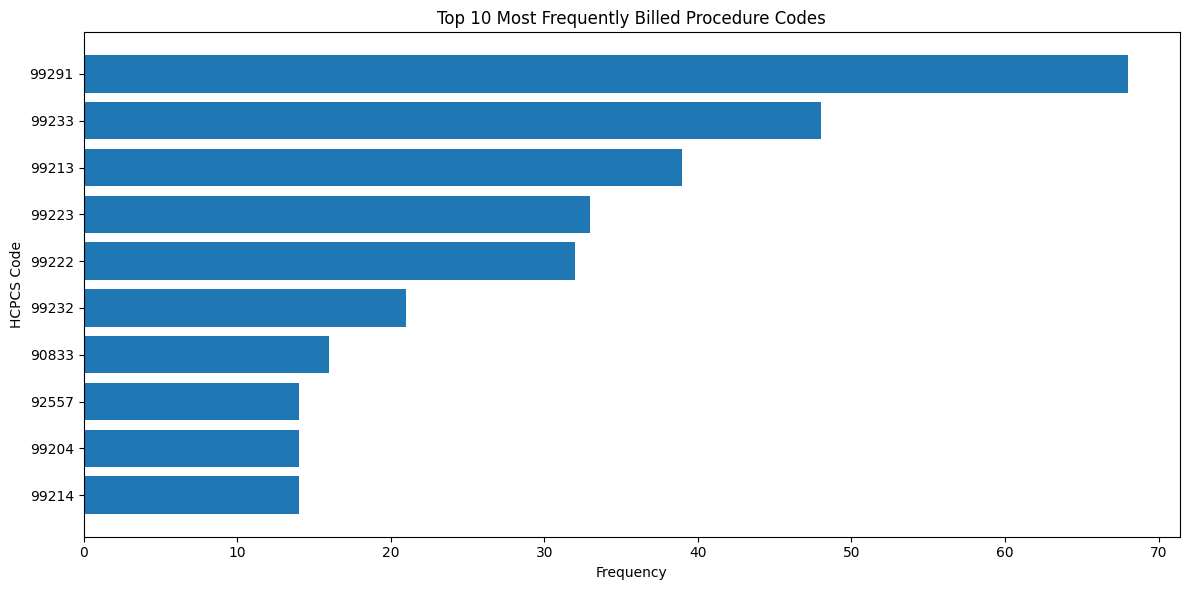

In [75]:
# Part 2: Relational Analysis
# Question 4: What are the 10 most frequently billed procedure codes (HCPCS)?
# Display: HCPCS code, description (if available in data), and frequency
# Create a bar chart showing the top 10 procedures

print("Q4: TOP 10 PROCEDURES")

# Group by HCPCS and get the description (taking the first one since they should be the same for each code)
hcpcs_freq = df_line.groupby('HCPCS').agg(
    Frequency=('HCPCS', 'count'),
    Description=('ClientProcedureName', 'first')
).reset_index()

# Sort by frequency and get top 10
top_10_hcpcs = hcpcs_freq.nlargest(10, 'Frequency')

# Display the results
print("Top 10 Most Frequently Billed Procedure Codes:")
print(top_10_hcpcs[['HCPCS', 'Description', 'Frequency']])

# Bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_10_hcpcs['HCPCS'].astype(str), top_10_hcpcs['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('HCPCS Code')
plt.title('Top 10 Most Frequently Billed Procedure Codes')
plt.gca().invert_yaxis()  # Highest frequency at top
plt.tight_layout()
plt.show()

# Interpretation: The most frequently billed procedure code is 99291 (Critical care)

In [76]:
# Part 2: Relational Analysis
# Question 5: How many claims were submitted for each PlaceOfService?
# What percentage of claims are for "INPATIENT" vs "DOCTOR'S OFFICE"?

print("Q5: CLAIMS BY PLACE OF SERVICE")

# of claims  submitted for PlaceOfService/Facility_Location?
print("Claims by Place of Service:")
print(df_header['Facility_Location'].value_counts())

# Calculations for percentage of claims for "INPATIENT" vs "DOCTOR'S OFFICE"?
total_claims = len(df_header)
inpatient_count = (df_header['Facility_Location'] == 'INPATIENT').sum()
doctors_office_count = (df_header['Facility_Location'] == "DOCTOR'S OFFICE").sum()

inpatient_pct = (inpatient_count / total_claims) * 100
doctors_office_pct = (doctors_office_count / total_claims) * 100

print(f"\nInpatient %: {inpatient_pct:.2f}%")
print(f"Doctor's Office %: {doctors_office_pct:.2f}%")

# Interpretation: "Inpatient" has the most claims and highest percentage of claims.

Q5: CLAIMS BY PLACE OF SERVICE
Claims by Place of Service:
Facility_Location
INPATIENT              231
DOCTOR'S OFFICE        132
OUTPATIENT HOSPITAL     14
AMBULATORY SURGERY      10
EMERGENCY                1
Name: count, dtype: int64

Inpatient %: 59.54%
Doctor's Office %: 34.02%


In [77]:
# Part 3: Advanced Analysis with Joins
# Question 6: Claims with High Service Line Counts
# Merge the HEADER and LINE files
# Calculate the total number of service lines per claim
# Identify claims with 5 or more service lines
# Display: ClaimId, Provider name, number of lines, and total charges

print("Q6: CLAIMS WITH 5+ SERVICE LINES")

# Group LINE file by claim ID
lines_per_claim = df_line.groupby('ProspectiveClaimId').agg(
    NumLines=('LinePos', 'count'),
    TotalCharges=('Charges', 'sum')
).reset_index()

# Filter for claims with 5+ lines and merge with HEADER to get provider name
# Sort by number of lines (highest first)
high_lines = lines_per_claim[lines_per_claim['NumLines'] >= 5].merge(
    df_header[['ProspectiveClaimId', 'BillingProvFirstName']],
    on='ProspectiveClaimId'
).sort_values('NumLines', ascending=False)

print(high_lines.head(10))

# Interpretation: There are 5 claims with 5 or more service lines. SB Children's Service has the highest with 7 lines and $1,163 in charges.

Q6: CLAIMS WITH 5+ SERVICE LINES
   ProspectiveClaimId  NumLines  TotalCharges  \
4            36794825         7          1163   
0            36668119         6          1030   
2            36740402         6           945   
1            36710175         5           873   
3            36757684         5           873   

                  BillingProvFirstName  
4                SB CHILDREN'S SERVICE  
0  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY  
2  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY  
1  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY  
3  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY  


In [78]:
# Part 3: Advanced Analysis with Joins
# Question 7: Diagnoses-Procedure Combinations
# Create a merged dataset linking claims to both procedures and diagnoses
# Find the most common diagnosis code (CodeValue) associated with CPT code 99291
# Hint: You'll need to merge all three files together

print("Q7: DIAGNOSIS WITH CPT 99291")

# Merge all three files
merged = df_line.merge(df_code, on='ProspectiveClaimId')

# Filter for CPT 99291 to find the most common diagnosis
dx_with_99291 = merged[merged['HCPCS'] == '99291']['CodeValue'].value_counts().head(10)
print(dx_with_99291)

# Interpretation: The most common diagnosis associated with CPT 99291 (Critical Care) is J96.01 (Acute respiratory failure with hypoxia) with 53 occurrences.

Q7: DIAGNOSIS WITH CPT 99291
CodeValue
J96.01     53
G93.5      34
E78.5      33
I61.9      26
D64.9      25
I10        24
I60.8      24
I95.9      20
D72.829    19
I67.848    17
Name: count, dtype: int64


In [79]:
# Part 3: Advanced Analysis with Joins
# Question 8: Charges by Payer
# Merge HEADER and LINE files
# Calculate total charges (sum of all line charges) per claim
# Group by PrimaryPayerName and calculate:
  # Total charges
  # Average charges per claim
  # Number of claims
# Sort by total charges descending and display top 10 payers

print("Q8: CHARGES BY PAYER")

# Calculate total charges per claim by summing all line charges
claim_totals = df_line.groupby('ProspectiveClaimId')['Charges'].sum().reset_index()

# Merge with HEADER to get payer information for each claim
payer_charges = claim_totals.merge(
    df_header[['ProspectiveClaimId', 'PrimaryPayerName']],
    on='ProspectiveClaimId'
)
# Group by payer, sort by total charges and show top 10
payer_summary = payer_charges.groupby('PrimaryPayerName').agg(
    TotalCharges=('Charges', 'sum'),
    AvgCharges=('Charges', 'mean'),
    NumClaims=('Charges', 'count')
).sort_values('TotalCharges', ascending=False).head(10)

print(payer_summary)

# Interpreation: Medicare has the highest total charges at $131,008 across 242 claims with an average of $541 per claim.

Q8: CHARGES BY PAYER
                                    TotalCharges   AvgCharges  NumClaims
PrimaryPayerName                                                        
MEDICARE                                  131008   541.355372        242
HEALTHFIRST FFS                            29794   647.695652         46
FIDELIS/BETTER HEALTH PLAN                 10810   415.769231         26
HIP MEDICAID                               10014   589.058824         17
AETNA                                       6930  1155.000000          6
DIRECT SELF PAY                             6575  1095.833333          6
UNITED COMMUNITY PLAN GOVT PROGRAM          5175  1035.000000          5
HEALTHFIRST CAPITATED                       4905   490.500000         10
EMPIRE BLUE SR                              4620  1155.000000          4
MAGNACARE                                   3465  1155.000000          3


Q9: Which providers bill for the most complex cases?
                                     AvgDiagnoses  NumClaims
BillingProvFirstName                                        
NEW YORK SPINE AND BRAIN SURGERY         9.231884         69
SB INTERNISTS                            3.592105        152
UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY      2.125000         40
SB SURGICAL ASSOCIATES                   2.049383         81
SB PSYCHIATRIC ASSOCIATES                1.805556         36


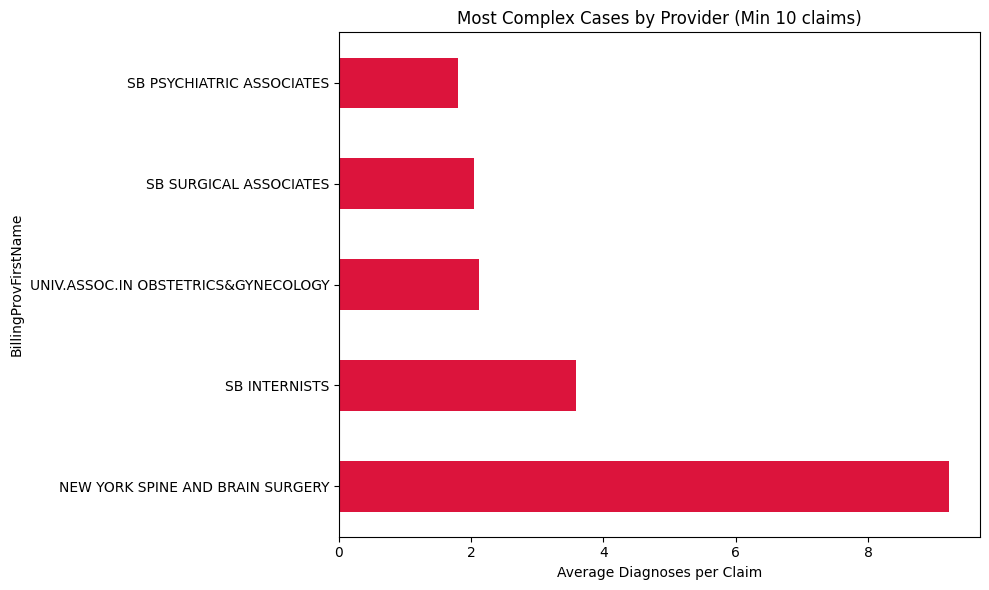

In [80]:
# Part 4: Creative Analysis
# Question 9: Your Own Analysis Develop and answer your own analytical question using the claims data. Your question should:
# Require merging at least two of the three files
# Use groupby or aggregation
# Provide meaningful insight about the data
# Include at least one visualization

# Question 9: Which providers bill for the most complex cases (highest number of diagnosis codes)?

print("Q9: Which providers bill for the most complex cases?")

# Count the number of diagnosis codes per claim
dx_per_claim = df_code.groupby('ProspectiveClaimId').size().reset_index(name='NumDx')

# Merge with HEADER to get provider name for each claim
complexity = dx_per_claim.merge(
    df_header[['ProspectiveClaimId', 'BillingProvFirstName']],
    on='ProspectiveClaimId'
)
# Group by provider, filter for providers with at least 10 claims and sort by average diagnoses, show top 10
provider_complexity = complexity.groupby('BillingProvFirstName').agg(
    AvgDiagnoses=('NumDx', 'mean'),
    NumClaims=('NumDx', 'count')
).query('NumClaims >= 10').sort_values('AvgDiagnoses', ascending=False).head(10)

print(provider_complexity)

# Bar Chart
provider_complexity['AvgDiagnoses'].plot(kind='barh', color='crimson', figsize=(10,6))
plt.xlabel('Average Diagnoses per Claim')
plt.title('Most Complex Cases by Provider (Min 10 claims)')
plt.tight_layout()
plt.show()

# Interpretation: New York Spine and Brain Surgery handles the most complex cases with an average of 9.23 diagnosis codes per claim across 69 claims.